In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_NL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,NaN,0.49,0.15,0.5,0.0,0.53,NaN
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,NaN,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,NaN,0.46,NaN,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,NaN,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	74
float64		column 2	185
float64		column 3	148
float64		column 4	148
float64		column 5	74
float64		column 6	111
float64		column 7	148
float64		column 8	296


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1410.000000,1299.000000,1336.000000,1336.000000,1410.000000,1373.000000,1336.000000,1188.000000
mean,0.499461,0.501863,0.500150,0.258054,0.504255,0.007742,0.500449,0.272694
std,0.134728,0.118932,0.084689,0.132334,0.045946,0.077524,0.056531,0.100913
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.430000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.570000,0.570000,0.550000,0.310000,0.500000,0.000000,0.530000,0.290000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

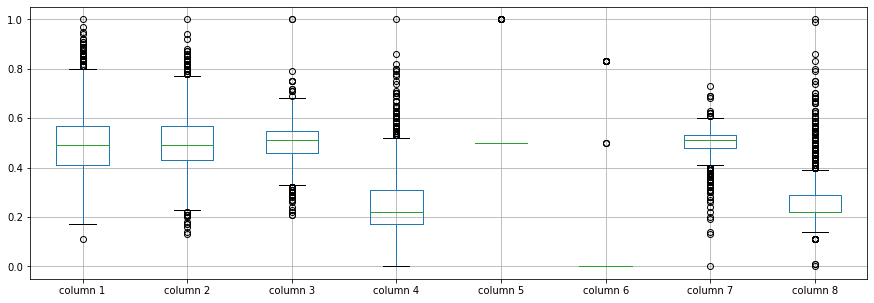

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.499461
column 2    0.501863
column 3    0.500150
column 4    0.258054
column 5    0.504255
column 6    0.007742
column 7    0.500449
column 8    0.272694
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.560517,-0.163478,0.142287,0.072101,0.026669,0.063085,-0.126997
column 2,0.560517,1.000000,-0.240588,0.113279,0.036688,0.021427,0.097428,-0.092849
column 3,-0.163478,-0.240588,1.000000,0.054293,0.009695,0.027546,-0.173357,-0.031412
column 4,0.142287,0.113279,0.054293,1.000000,0.000040,-0.018994,-0.082705,-0.034899
column 5,0.072101,0.036688,0.009695,0.000040,1.000000,-0.009429,0.040577,0.015447
column 6,0.026669,0.021427,0.027546,-0.018994,-0.009429,1.000000,0.019575,-0.033234
column 7,0.063085,0.097428,-0.173357,-0.082705,0.040577,0.019575,1.000000,0.083708
column 8,-0.126997,-0.092849,-0.031412,-0.034899,0.015447,-0.033234,0.083708,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+20,8+20+20,8+20+20+20,8+20+20+20+20,8+20+20+20+20+20,8+20+20+20+20+20+20,8+20+20+20+20+20,8+20+20+20+20,8+20+20+20,8+20+20,8+20,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.7441492080688477
Epoch: 1 , loss: 2.369576880465383
Epoch: 2 , loss: 2.131341082894284
Epoch: 3 , loss: 1.997151749289554
Epoch: 4 , loss: 1.858422030573306
Epoch: 5 , loss: 1.7688882726690043
Epoch: 6 , loss: 1.687026973651803
Epoch: 7 , loss: 1.599307603162268
Epoch: 8 , loss: 1.5162957142228666
Epoch: 9 , loss: 1.483617312234381
Epoch: 10 , loss: 1.418408830528674
Epoch: 11 , loss: 1.3896230783151544
Epoch: 12 , loss: 1.3503982988388643
Epoch: 13 , loss: 1.2952332483685536
Epoch: 14 , loss: 1.2781023227650186
Epoch: 15 , loss: 1.2566726713076881
Epoch: 16 , loss: 1.2118103549532269
Epoch: 17 , loss: 1.2178011478289315
Epoch: 18 , loss: 1.180634917124458
Epoch: 19 , loss: 1.1568277121885964
Epoch: 20 , loss: 1.14310018459092
Epoch: 21 , loss: 1.1413169425466787
Epoch: 22 , loss: 1.1318112106426903
Epoch: 23 , loss: 1.0968030568050302
Epoch: 24 , loss: 1.095402862066808
Epoch: 25 , loss: 1.0672158935

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.000000,-0.346617,0.0,0.000000,0.0,0.0,0.0,-0.046264
3,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
1479,-0.436716,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
1480,0.000000,0.165155,0.0,0.086104,0.0,0.0,0.0,0.000000
1481,0.000000,0.000000,0.0,0.013271,0.0,0.0,0.0,0.000000
1482,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(5.65002530729627, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.12045897988444766

In [18]:
new_df.iloc[66,:]

column 1    0.460000
column 2    0.490000
column 3    0.580000
column 4    0.230000
column 5    0.500000
column 6    0.000000
column 7    0.575046
column 8    0.220000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.580000,0.610000,0.47,0.130000,0.5,0.0,0.48,0.220000
1,0.430000,0.670000,0.48,0.270000,0.5,0.0,0.53,0.220000
2,0.640000,0.273383,0.49,0.150000,0.5,0.0,0.53,0.173736
3,0.580000,0.440000,0.57,0.130000,0.5,0.0,0.54,0.220000
4,0.420000,0.440000,0.48,0.540000,0.5,0.0,0.48,0.220000
...,...,...,...,...,...,...,...,...
1479,0.383284,0.630000,0.47,0.180000,0.5,0.0,0.50,0.220000
1480,0.350000,0.455155,0.46,0.226104,0.5,0.0,0.54,0.660000
1481,0.410000,0.470000,0.50,0.153271,0.5,0.0,0.53,0.370000
1482,0.510000,0.450000,0.62,0.250000,0.5,0.0,0.59,0.220000


In [20]:
imputations[-1].to_excel("Yeast_NL_10(imp).xlsx", index=False, header=False)